In [1]:
import os # accessing directory structure
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
%matplotlib inline

In [2]:
# import libraries
from nltk.tokenize import word_tokenize , sent_tokenize
from sklearn.pipeline import Pipeline , FeatureUnion
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier ,BaggingClassifier ,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,  GridSearchCV 
from sklearn.metrics import classification_report ,confusion_matrix , accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import pickle

[nltk_data] Downloading package punkt to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Emotion Detection from Text.zip',
 'emotion-labels-test.csv',
 'emotion-labels-train.csv',
 'emotion-labels-val.csv',
 'emotion_detection_4classes.ipynb',
 'emotion_detection_5classes.ipynb',
 'text_emotion.csv',
 'text_emotion.csv.zip',
 'tweet_emotions.csv']

In [4]:
!pwd

C:\Users\Ahmad Abd Elhameed\emotion detection study


In [6]:
test_data = pd.read_csv("emotion-labels-test.csv")
train_data = pd.read_csv("emotion-labels-train.csv")
validation_data = pd.read_csv("emotion-labels-val.csv")

In [7]:
test_data.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


In [8]:
test_data.shape

(3142, 2)

In [9]:
test_data.label.unique()

array(['joy', 'fear', 'anger', 'sadness'], dtype=object)

In [10]:
train_data.label.value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

In [11]:
print("Train : ", train_data.shape)
print("Test : ", test_data.shape)
print("Validation : ", validation_data.shape)

Train :  (3613, 2)
Test :  (3142, 2)
Validation :  (347, 2)


## Data Understanding
describe_data function will help us understand each dataset

In [12]:
def describe_data(data_type,data,label):
    print(data_type," DESCRIPTION")
    print("--------------------------")
    size=data.shape
    null_values=data.isnull().sum().sum()
    
    label_count=data[label].value_counts()
    print(data_type," shape:",size,"\n")
    print(data_type," contains:",null_values," null values\n")
    print("Label counts:")  
    print(label_count)
    print()
    
    print("*****",data_type," label count plot ****")
    sns.countplot(
        data=data,
        x=label
    )

Training Data  DESCRIPTION
--------------------------
Training Data  shape: (3613, 2) 

Training Data  contains: 0  null values

Label counts:
fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

***** Training Data  label count plot ****


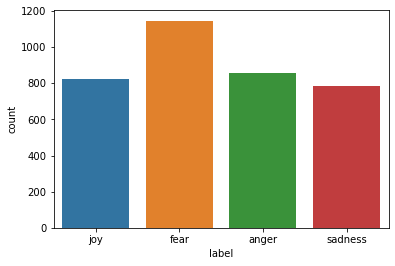

In [13]:
describe_data("Training Data",train_data,"label")

Testing Data  DESCRIPTION
--------------------------
Testing Data  shape: (3142, 2) 

Testing Data  contains: 0  null values

Label counts:
fear       995
anger      760
joy        714
sadness    673
Name: label, dtype: int64

***** Testing Data  label count plot ****


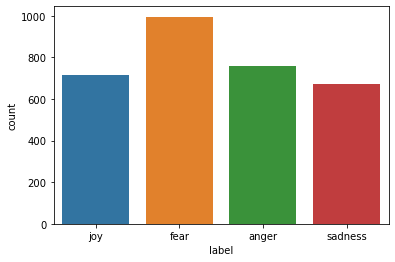

In [14]:
describe_data("Testing Data",test_data,"label")

Validation Data  DESCRIPTION
--------------------------
Validation Data  shape: (347, 2) 

Validation Data  contains: 0  null values

Label counts:
fear       110
anger       84
joy         79
sadness     74
Name: label, dtype: int64

***** Validation Data  label count plot ****


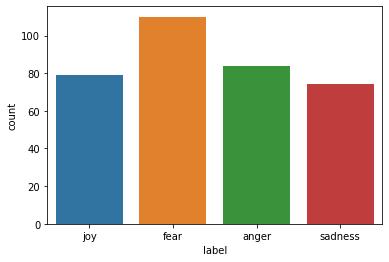

In [15]:
describe_data("Validation Data",validation_data,"label")

In [18]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    347 non-null    object
 1   label   347 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [19]:
def label_encode(data,label):
    labels=data[label].map(
    {
        "joy":0,
        "fear":1,
        "anger":2,
        "sadness":3
    }
    )
    return labels

In [20]:
train_data["Label"]=label_encode(train_data,"label")
validation_data["Label"]=label_encode(validation_data,"label")
test_data["Label"]=label_encode(test_data,"label")

In [21]:
train_data.head()

,text,label,Label
0,Just got back from seeing @GaryDelaney in Burs...,joy,0
1,Oh dear an evening of absolute hilarity I don'...,joy,0
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0
4,I feel so blessed to work with the family that...,joy,0


In [22]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(train_data.Label.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = [str(int(i)) for i in range(train_data["Label"].nunique())]) 
df = pd.concat([train_data, dfOneHot], axis=1)
#printing to verify 
print(df.head())

                                                text label  Label    0    1  \
0  Just got back from seeing @GaryDelaney in Burs...   joy      0  1.0  0.0   
1  Oh dear an evening of absolute hilarity I don'...   joy      0  1.0  0.0   
2  Been waiting all week for this game ❤️❤️❤️ #ch...   joy      0  1.0  0.0   
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy      0  1.0  0.0   
4  I feel so blessed to work with the family that...   joy      0  1.0  0.0   

     2    3  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  


In [24]:
df.rename(columns={'0': 'joy', '1': 'fear',"2":"anger","3":"sadness"}, inplace=True)

In [25]:
df.head()

,text,label,Label,joy,fear,anger,sadness
0,Just got back from seeing @GaryDelaney in Burs...,joy,0,1.0,0.0,0.0,0.0
1,Oh dear an evening of absolute hilarity I don'...,joy,0,1.0,0.0,0.0,0.0
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0,1.0,0.0,0.0,0.0
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0,1.0,0.0,0.0,0.0
4,I feel so blessed to work with the family that...,joy,0,1.0,0.0,0.0,0.0


In [26]:
df2 = df[["joy","fear","anger","sadness"]].astype(int)

In [27]:
df2.head()

,joy,fear,anger,sadness
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [29]:
df3 = pd.concat([df["text"], df2], axis=1)

In [30]:
df3.head()

,text,joy,fear,anger,sadness
0,Just got back from seeing @GaryDelaney in Burs...,1,0,0,0
1,Oh dear an evening of absolute hilarity I don'...,1,0,0,0
2,Been waiting all week for this game ❤️❤️❤️ #ch...,1,0,0,0
3,"@gardiner_love : Thank you so much, Gloria! Yo...",1,0,0,0
4,I feel so blessed to work with the family that...,1,0,0,0


In [31]:
test_data.head()

,text,label,Label
0,You must be knowing #blithe means (adj.) Happ...,joy,0
1,Old saying 'A #smile shared is one gained for ...,joy,0
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy,0
3,@Elaminova sparkling water makes your life spa...,joy,0
4,I'm tired of everybody telling me to chill out...,joy,0


In [32]:
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(test_data.Label.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = [str(int(i)) for i in range(test_data["Label"].nunique())]) 
df_test = pd.concat([test_data, dfOneHot], axis=1)
#printing to verify 
df_test.head()

,text,label,Label,0,1,2,3
0,You must be knowing #blithe means (adj.) Happ...,joy,0,1.0,0.0,0.0,0.0
1,Old saying 'A #smile shared is one gained for ...,joy,0,1.0,0.0,0.0,0.0
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy,0,1.0,0.0,0.0,0.0
3,@Elaminova sparkling water makes your life spa...,joy,0,1.0,0.0,0.0,0.0
4,I'm tired of everybody telling me to chill out...,joy,0,1.0,0.0,0.0,0.0


In [33]:
df_test.drop(['label',"Label"],axis=1,inplace=True)

In [34]:
df_test.rename(columns={'0': 'joy', '1': 'fear',"2":"anger","3":"sadness"}, inplace=True)

In [35]:
df_test1 = df_test[["joy","fear","anger","sadness"]].astype(int)

In [36]:
df_test1.head()

,joy,fear,anger,sadness
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [37]:
df_test2 = pd.concat([df_test["text"], df_test1], axis=1)

In [38]:
df_test2.head()

,text,joy,fear,anger,sadness
0,You must be knowing #blithe means (adj.) Happ...,1,0,0,0
1,Old saying 'A #smile shared is one gained for ...,1,0,0,0
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,1,0,0,0
3,@Elaminova sparkling water makes your life spa...,1,0,0,0
4,I'm tired of everybody telling me to chill out...,1,0,0,0


In [39]:
validation_data.head()

,text,label,Label
0,"@theclobra lol I thought maybe, couldn't decid...",joy,0
1,Nawaz Sharif is getting more funnier than @kap...,joy,0
2,Nawaz Sharif is getting more funnier than @kap...,joy,0
3,@tomderivan73 😁...I'll just people watch and e...,joy,0
4,I love my family so much #lucky #grateful #sma...,joy,0


In [40]:
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(validation_data.Label.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = [str(int(i)) for i in range(validation_data["Label"].nunique())]) 
df_val = pd.concat([validation_data, dfOneHot], axis=1)
#printing to verify 
df_val.head()

,text,label,Label,0,1,2,3
0,"@theclobra lol I thought maybe, couldn't decid...",joy,0,1.0,0.0,0.0,0.0
1,Nawaz Sharif is getting more funnier than @kap...,joy,0,1.0,0.0,0.0,0.0
2,Nawaz Sharif is getting more funnier than @kap...,joy,0,1.0,0.0,0.0,0.0
3,@tomderivan73 😁...I'll just people watch and e...,joy,0,1.0,0.0,0.0,0.0
4,I love my family so much #lucky #grateful #sma...,joy,0,1.0,0.0,0.0,0.0


In [41]:
df_val.rename(columns={'0': 'joy', '1': 'fear',"2":"anger","3":"sadness"}, inplace=True)
df_val.drop(['label',"Label"],axis=1,inplace=True)
df_val1 = df_val[['joy','fear',"anger","sadness"]].astype(int)
df_val2 = pd.concat([df_val["text"], df_val1], axis=1)
df_val2.head()

,text,joy,fear,anger,sadness
0,"@theclobra lol I thought maybe, couldn't decid...",1,0,0,0
1,Nawaz Sharif is getting more funnier than @kap...,1,0,0,0
2,Nawaz Sharif is getting more funnier than @kap...,1,0,0,0
3,@tomderivan73 😁...I'll just people watch and e...,1,0,0,0
4,I love my family so much #lucky #grateful #sma...,1,0,0,0


In [42]:
X = df3["text"]
y = df3[['joy','fear',"anger","sadness"]]

## Tokenization function to process your text data

In [43]:
lemmatizer = WordNetLemmatizer()

In [44]:
def tokenize(text):
    lower_text = text.lower()
    normalized_text = re.sub(r"[^a-zA-Z0-9]"," ",lower_text)
    text_token = word_tokenize(normalized_text)
    remove_stop_words = [word for word in text_token if word not in stopwords.words('english')]
    lemmatized = [lemmatizer.lemmatize(word) for word in remove_stop_words]
    return lemmatized

## A machine learning pipeline
This machine pipeline should take in the comment column as input and output classification results on the other 6 categories in the dataset.

## Random Forest

In [45]:
pipeline = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ("clf",MultiOutputClassifier(RandomForestClassifier()))])

### Train pipeline
- Prepare data
- Train pipeline

In [46]:
X_train = X
y_train = y
X_test = df_test2["text"]
y_test = df_test2[['joy','fear',"anger","sadness"]]
X_val = df_val2["text"]
y_val = df_val2[['joy','fear',"anger","sadness"]]

In [47]:
print ("X_train shape = ",X_train.shape)
print ("y_train shape = ",y_train.shape)
print ("X_test shape = ",X_test.shape)
print ("y_test shape = ",y_test.shape)
print ("X_val shape = ",X_val.shape)
print ("y_val shape = ",y_val.shape)

X_train shape =  (3613,)
y_train shape =  (3613, 4)
X_test shape =  (3142,)
y_test shape =  (3142, 4)
X_val shape =  (347,)
y_val shape =  (347, 4)


In [48]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x0000025AAEB47840>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

In [49]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

In [50]:
# predict on test data
y_pred = pipeline.predict(X_test)

## Test the model
f1 score, precision and recall for each output category of the dataset. By iterating through the columns and calling sklearn's classification_report on each.

In [51]:
total_scores = []
def accuracy_report(y_test,y_pred):
    i = 0
    for feat in y_test:
        print("Feature {}: {}".format(i+1,feat))
        print(classification_report(y_test[feat],y_pred[:,i]))
        accuracy = accuracy_score(y_test.iloc[:,i],y_pred[:,i])
        total_scores.append(accuracy)
        i+=1
    print("Total Accuracy : {:.4f}".format(np.mean(total_scores)))

In [52]:
accuracy_report(y_test,y_pred)

Feature 1: joy
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2428
           1       0.92      0.84      0.88       714

    accuracy                           0.95      3142
   macro avg       0.94      0.91      0.92      3142
weighted avg       0.95      0.95      0.95      3142

Feature 2: fear
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2147
           1       0.87      0.72      0.79       995

    accuracy                           0.88      3142
   macro avg       0.87      0.84      0.85      3142
weighted avg       0.88      0.88      0.87      3142

Feature 3: anger
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2382
           1       0.91      0.74      0.82       760

    accuracy                           0.92      3142
   macro avg       0.92      0.86      0.88      3142
weighted avg       0.92   

## AdaBoost

In [53]:
pipeline_adaboost = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(AdaBoostClassifier()))])
pipeline_adaboost.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_adaboost.predict(X_test)
accuracy_report(y_test,y_pred)

Feature 1: joy
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2428
           1       0.96      0.77      0.86       714

    accuracy                           0.94      3142
   macro avg       0.95      0.88      0.91      3142
weighted avg       0.94      0.94      0.94      3142

Feature 2: fear
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2147
           1       0.94      0.63      0.76       995

    accuracy                           0.87      3142
   macro avg       0.89      0.81      0.83      3142
weighted avg       0.88      0.87      0.86      3142

Feature 3: anger
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2382
           1       0.96      0.74      0.83       760

    accuracy                           0.93      3142
   macro avg       0.94      0.86      0.89      3142
weighted avg       0.93   

## GradientBoosting

In [54]:
pipeline_boosting = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(GradientBoostingClassifier()))])
pipeline_boosting.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_boosting.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: joy
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2428
           1       0.91      0.73      0.81       714

    accuracy                           0.92      3142
   macro avg       0.92      0.86      0.88      3142
weighted avg       0.92      0.92      0.92      3142

Feature 2: fear
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2147
           1       0.93      0.63      0.75       995

    accuracy                           0.87      3142
   macro avg       0.89      0.80      0.83      3142
weighted avg       0.87      0.87      0.86      3142

Feature 3: anger
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      2382
           1       0.96      0.67      0.79       760

    accuracy                           0.91      3142
   macro avg       0.93      0.83      0.87      3142
weighted avg       0.92   

## Bagging

In [56]:
pipeline_bagging = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(BaggingClassifier()))])
pipeline_bagging.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_bagging.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: joy
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2428
           1       0.91      0.85      0.88       714

    accuracy                           0.95      3142
   macro avg       0.94      0.91      0.92      3142
weighted avg       0.95      0.95      0.95      3142

Feature 2: fear
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2147
           1       0.85      0.74      0.79       995

    accuracy                           0.88      3142
   macro avg       0.87      0.84      0.85      3142
weighted avg       0.88      0.88      0.87      3142

Feature 3: anger
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2382
           1       0.89      0.79      0.84       760

    accuracy                           0.93      3142
   macro avg       0.91      0.88      0.90      3142
weighted avg       0.92   

## ExtraTrees

In [58]:
pipeline_extratrees = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(ExtraTreesClassifier()))])
pipeline_extratrees.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_extratrees.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: joy
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2428
           1       0.94      0.83      0.88       714

    accuracy                           0.95      3142
   macro avg       0.95      0.91      0.92      3142
weighted avg       0.95      0.95      0.95      3142

Feature 2: fear
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2147
           1       0.87      0.76      0.81       995

    accuracy                           0.89      3142
   macro avg       0.88      0.85      0.86      3142
weighted avg       0.89      0.89      0.89      3142

Feature 3: anger
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2382
           1       0.91      0.78      0.84       760

    accuracy                           0.93      3142
   macro avg       0.92      0.87      0.89      3142
weighted avg       0.93   

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


## Decision Tree

In [69]:
pipeline_DT = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ("clf",MultiOutputClassifier(DecisionTreeClassifier()))])
pipeline_DT.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_DT.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: joy
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2428
           1       0.83      0.86      0.85       714

    accuracy                           0.93      3142
   macro avg       0.89      0.91      0.90      3142
weighted avg       0.93      0.93      0.93      3142

Feature 2: fear
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2147
           1       0.78      0.75      0.76       995

    accuracy                           0.85      3142
   macro avg       0.83      0.83      0.83      3142
weighted avg       0.85      0.85      0.85      3142

Feature 3: anger
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2382
           1       0.79      0.80      0.79       760

    accuracy                           0.90      3142
   macro avg       0.86      0.86      0.86      3142
weighted avg       0.90   

## Naive Bayes

In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
pipeline_NV = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ("clf",MultiOutputClassifier(MultinomialNB()))])
pipeline_NV.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_NV.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: joy
              precision    recall  f1-score   support

           0       0.79      1.00      0.89      2428
           1       0.98      0.12      0.22       714

    accuracy                           0.80      3142
   macro avg       0.89      0.56      0.55      3142
weighted avg       0.84      0.80      0.73      3142

Feature 2: fear
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      2147
           1       0.94      0.24      0.38       995

    accuracy                           0.75      3142
   macro avg       0.84      0.62      0.61      3142
weighted avg       0.80      0.75      0.70      3142

Feature 3: anger
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2382
           1       0.98      0.11      0.20       760

    accuracy                           0.78      3142
   macro avg       0.88      0.55      0.54      3142
weighted avg       0.83   